<a href="https://colab.research.google.com/github/RocioLiu/TensorFlow_Specialization/blob/master/tf_spec_c2CNN_w2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cats v Dogs Augmentation

Let's start with a model that's very effective at learning Cats v Dogs.

It's similar to the previous models that you have used, but I have updated the layers definition. Note that there are now 4 convolutional layers with 32, 64, 128 and 128 convolutions respectively.

Also, this will train for 100 epochs, because I want to plot the graph of loss and accuracy.

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

In [0]:
import os
import tensorflow as tf
import zipfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [0]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir, # This is the source directory for training images
    target_size = (150,150),
    batch_size = 20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode = 'binary'
)

# Flow validation images in batches of 20 using vlidation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, # This is the source directory for vlidation images
    target_size = (150,150),
    batch_size = 20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,  # 2000 images = batch_size * steps
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,  # 1000 images = batch_size * steps
    verbose = 1)

Epoch 1/100
100/100 - 106s - loss: 0.6573 - acc: 0.6030 - val_loss: 0.6246 - val_acc: 0.6780
Epoch 2/100
100/100 - 107s - loss: 0.6087 - acc: 0.6690 - val_loss: 0.5988 - val_acc: 0.6620
Epoch 3/100
100/100 - 106s - loss: 0.5645 - acc: 0.7040 - val_loss: 0.5633 - val_acc: 0.7080
Epoch 4/100
100/100 - 107s - loss: 0.5322 - acc: 0.7350 - val_loss: 0.5897 - val_acc: 0.6950
Epoch 5/100
100/100 - 108s - loss: 0.5179 - acc: 0.7310 - val_loss: 0.5562 - val_acc: 0.7110
Epoch 6/100
100/100 - 108s - loss: 0.4775 - acc: 0.7740 - val_loss: 0.5397 - val_acc: 0.7220
Epoch 7/100
100/100 - 108s - loss: 0.4523 - acc: 0.7855 - val_loss: 0.5388 - val_acc: 0.7300
Epoch 8/100
100/100 - 108s - loss: 0.4209 - acc: 0.8080 - val_loss: 0.5390 - val_acc: 0.7280
Epoch 9/100
100/100 - 108s - loss: 0.4004 - acc: 0.8170 - val_loss: 0.5502 - val_acc: 0.7250
Epoch 10/100
100/100 - 108s - loss: 0.3744 - acc: 0.8270 - val_loss: 0.5259 - val_acc: 0.7480
Epoch 11/100
100/100 - 108s - loss: 0.3454 - acc: 0.8565 - val_loss: 

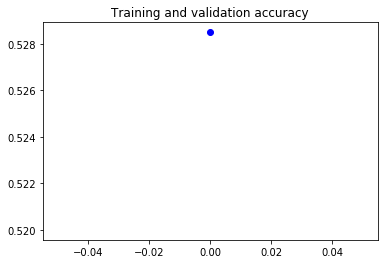

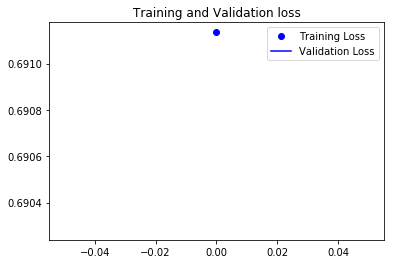

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')

plt.legend()

plt.show()

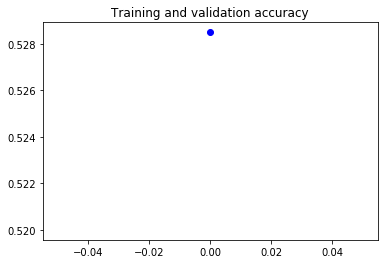

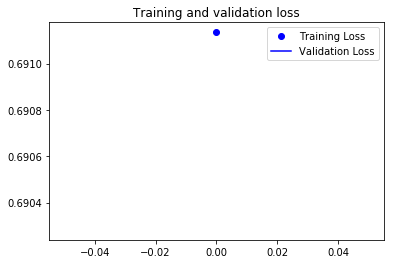

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()